
<p style="text-align:center;background-color: grey "> 
    <span style="font-size:40px; color:black; font-family:'Times New Roman', serif; font-weight:bold;">
        Task 3 - Employee turnover prediction
        <br>
        TechnoHacks Internship<br><br>
    </span> 
    <span style="font-size:30px; color:black; font-family:'Times New Roman', serif; font-weight:bold;">
        Author - Anuj Nanda Gorkhali
    </span>
</p>

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')


# **Importing Dataset**

In [3]:
df=pd.read_csv('task3data.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 35)

# **Performing EDA**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**As we can see above there is no null values in our dataset.**

**Now let's convert our output variable from categorical to numerical.**

In [9]:
y_dict = {"Yes":1,"No":0}
df["Attrition_numeric"] = df["Attrition"].map(y_dict)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [11]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numeric
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105


**Some columns in our dataset are of no use for the target variable so let's drop those columns**

In [12]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours',"Attrition"], axis="columns", inplace=True)


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


**The conclusion from above description is :**

**The average age is 36 years, there are very young people with 18 years and people with 60 years.**

**There are people who live very close to work, almost next door, and others are almost an hour's drive away!**

**Salaries are a world of their own! The average is 6500 usd, the lowest earners reach 1000 usd and the highest earners almost 20000 usd.**

**There are employees who have been working for almost 40 years and others who have just started! The average, however, is 7 years.**

**Now We are going to separate the workers into two dataframes according to Attrition and compare their averages.**

In [14]:
attrition_yes = df.loc[df["Attrition_numeric"] == 1]
attrition_no = df.loc[df["Attrition_numeric"] == 0]

In [15]:
# I use concat to join the two DF, rename the columns and then give it some color :)
df_mean_attrition = pd.concat((attrition_yes.mean(),attrition_no.mean()),axis=1)
df_mean_attrition.columns = ["Yes","No"]
df_mean_attrition.round(2).style.background_gradient(cmap="tab20_r",axis=1)

,Yes,No
Age,33.610000,37.560000
DailyRate,750.360000,812.500000
DistanceFromHome,10.630000,8.920000
Education,2.840000,2.930000
EnvironmentSatisfaction,2.460000,2.770000
HourlyRate,65.570000,65.950000
JobInvolvement,2.520000,2.770000
JobLevel,1.640000,2.150000
JobSatisfaction,2.470000,2.780000
MonthlyIncome,4787.090000,6832.740000


**Characteristics of employees who want to leave the IBM company**

**They tend to be younger, 33 years old on average, they tend to live farther from work, they are less satisfied with the work environment, they have lower incomes.**

**They have been working less years, they have less rights to stock options.**

# Now let's find what is the good employee attrition rate?

In [16]:
tasa_att = (df["Attrition_numeric"].sum() / df.shape[0]) * 100
print("Average Turnover rate at IBM is :",round(tasa_att,2))

Average Turnover rate at IBM is : 16.12


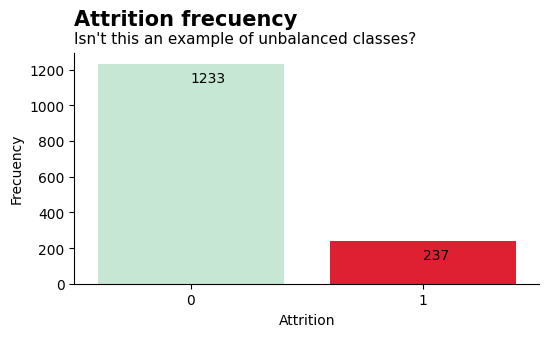

In [17]:
# let,s plot "Attrition frecuency"
colors = ["#C0EDD2","#FF0018"]
df_class = df["Attrition_numeric"].value_counts().reset_index()
plt.figure(figsize=(6,3))
ax = sns.barplot(x="index",y="Attrition_numeric",data=df_class,palette=colors)
sns.despine()
# another way to make titles more personalized
# plt.title("$\\bf{Attrition frecuency}$" +"\nIsn't this an example of unbalanced classes?")
ax.text(-0.5,1450,"Attrition frecuency",
        fontsize=15,
         fontweight='bold')
ax.text(-0.5,1350,"Isn't this an example of unbalanced classes?",
        fontsize=11)
# with a loop I add the values to the graphic text(x,y,s="values")
for num,text in enumerate(df_class["Attrition_numeric"]):
        ax.text(num,text-100,text)
plt.xlabel("Attrition")
plt.ylabel("Frecuency")
plt.show()

**As we can see above we are having imbalanced data in target column.**

**I am going to separate the numerical columns from the categorical columns; using describe makes it very easy**

In [18]:
num_col = df.describe().columns.tolist()
cat_col = df.describe(include="object").columns.tolist()

# Detecting Multicollinearity

In [19]:
corr = df[num_col].corr()

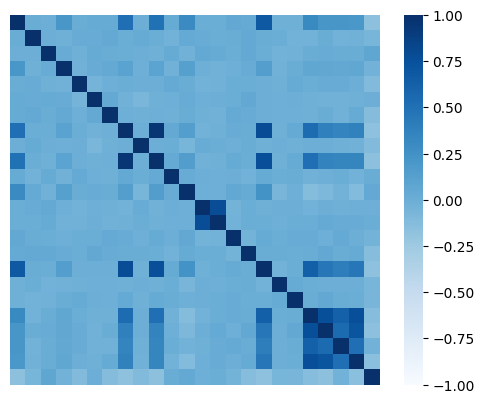

In [20]:
x = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap="Blues",
    square=True,xticklabels=False, yticklabels=False)

plt.show(block=False)

**we see that there is Multicollinearity; it is normal because there are variables that are related to each other, for example salary and working years. Further on we will see which are the most important variables**

In [21]:
corr["Attrition_numeric"].to_frame().style.background_gradient(cmap="Blues")

,Attrition_numeric
Age,-0.159205
DailyRate,-0.056652
DistanceFromHome,0.077924
Education,-0.031373
EnvironmentSatisfaction,-0.103369
HourlyRate,-0.006846
JobInvolvement,-0.130016
JobLevel,-0.169105
JobSatisfaction,-0.103481
MonthlyIncome,-0.159840


**Now let's see a quick summary of the categorical variables!**

In [22]:
df.describe(include="object").T

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


**We see that the most frequent in this company is a person who travels rarely, from the Research & Development department , educated in Life Sciences , gender Male, Married, Sales Executive and no OverTIme**

In [23]:
by_bussines =df.groupby("BusinessTravel")["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()

In [24]:
by_bussines

Attrition_numeric          
Attrition_numeric                 0         1
BusinessTravel                               
Non-Travel                 0.920000  0.080000
Travel_Frequently          0.750903  0.249097
Travel_Rarely              0.850431  0.149569

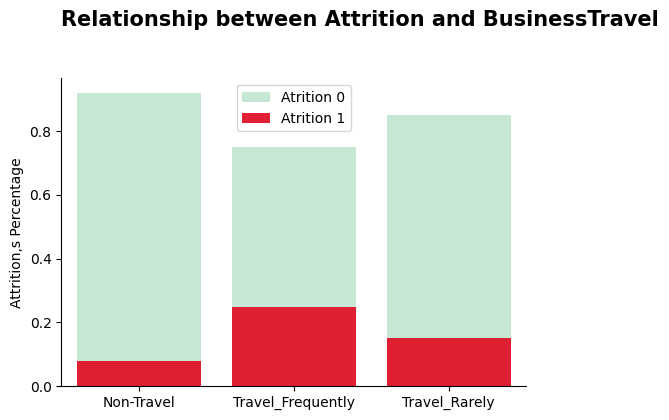

In [25]:
plt.figure(figsize=(6,4))
ax= sns.barplot(x=by_bussines.index,y=('Attrition_numeric', 0),data=by_bussines,color="#C0EDD2",label="Atrition 0")
sns.barplot(x=by_bussines.index,y=('Attrition_numeric', 1),data=by_bussines,color="#FF0018",label="Atrition 1")
plt.ylabel('')
plt.ylabel("Attrition,s Percentage")
plt.xlabel("")
plt.grid(False)
sns.despine()
plt.legend()
# using text to personalize title
ax.text(-.5,1.13,"Relationship between Attrition and BusinessTravel",
        fontsize=15,
         fontweight='bold')
plt.show(block=False)

**well, we can see that among employees who travel a lot, the attrition rate is much higher. Let's make a pivot table to check the data more thoroughly**

In [26]:
df.pivot_table("Attrition_numeric",index="JobRole",columns=["BusinessTravel"])

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
JobRole,,,
Healthcare Representative,0.066667,0.115385,0.055556
Human Resources,0.000000,0.400000,0.210526
Laboratory Technician,0.071429,0.313725,0.244444
Manager,0.083333,0.000000,0.051948
Manufacturing Director,0.000000,0.103448,0.067961
Research Director,0.000000,0.000000,0.032258
Research Scientist,0.142857,0.277778,0.133333
Sales Executive,0.102564,0.220339,0.175439
Sales Representative,0.000000,0.652174,0.327273


**we can see that among the sales representatives who travel a lot, 65 percent are not very happy; and it is also significant in Human resources: there are 40 percent of the employees who travel a lot who are not very happy either.**

**Let's check by department what the the attrition rate is**

In [27]:
by_jobRole =df.groupby("JobRole")["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()

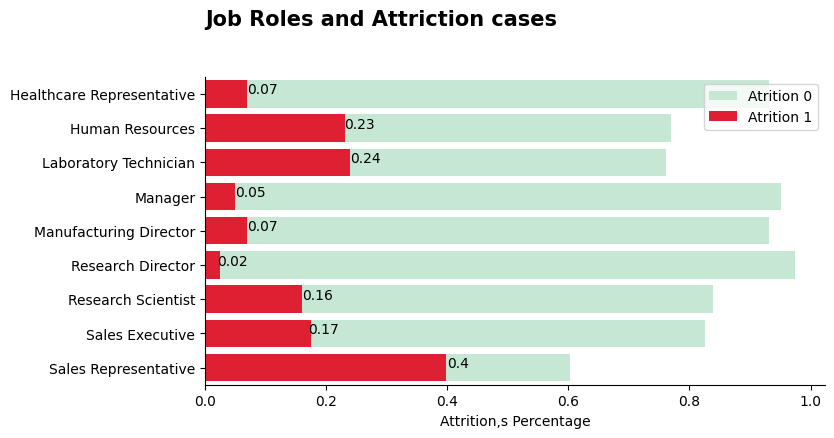

In [28]:
plt.figure(figsize=(8,4))
ax=sns.barplot(y=by_jobRole.index,x=('Attrition_numeric', 0),data=by_jobRole,color="#C0EDD2",label="Atrition 0")
sns.barplot(y=by_jobRole.index,x=('Attrition_numeric', 1),data=by_jobRole,color="#FF0018",label="Atrition 1")


plt.ylabel("")
plt.xlabel("Attrition,s Percentage")
plt.grid(False)
sns.despine()
plt.legend()
ax.text(0,-2,"Job Roles and Attriction cases",
        fontsize=15,
         fontweight='bold')

# with a loop I add the values to the graphic
for num,text in zip(range(9),round(by_jobRole['Attrition_numeric', 1],2)):
    ax.text(text,num,text)
plt.show(block=False)

**There are three departments where the attrition rate it is higher than usual: Sales Representative,Human Resources and Laboratoy Thecnician**

In [29]:
by_department =df.groupby("Department")["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()

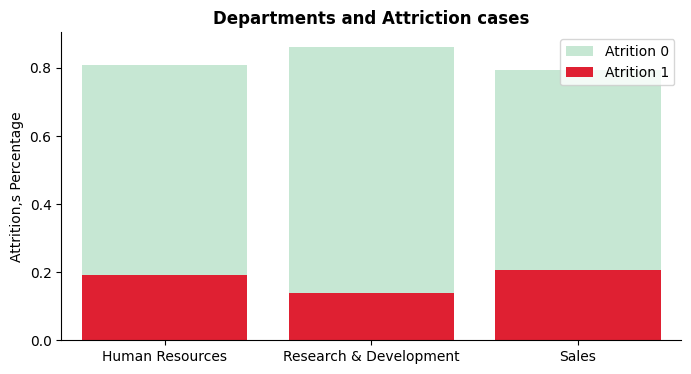

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(x=by_department.index,y=('Attrition_numeric', 0),data=by_department,color="#C0EDD2",label="Atrition 0")
sns.barplot(x=by_department.index,y=('Attrition_numeric', 1),data=by_department,color="#FF0018",label="Atrition 1")
plt.ylabel('')
plt.title("Departments and Attriction cases",fontweight="bold")
plt.xlabel("")
plt.ylabel("Attrition,s Percentage")
plt.grid(False)
plt.legend()
sns.despine()

**Age**


**let's look at age! the attrition rate is higher in younger people.**

**First we use the cut function to create four groups according to their ages and then groupby and value counts(normalize) to see the percentages. between 18 and 30 the attrition rate is the highest!**

In [31]:
cut_age = pd.cut(df["Age"],bins=[18,30,50,60],include_lowest=False)
df.groupby(cut_age)["Attrition_numeric"].value_counts(normalize=True).unstack()

Attrition_numeric,0,1
Age,,
"(18, 30]",0.746032,0.253968
"(30, 50]",0.873539,0.126461
"(50, 60]",0.874126,0.125874


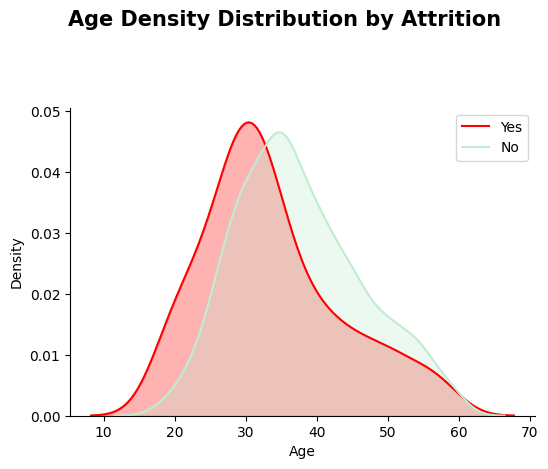

In [32]:
plt.figure(figsize=(6,4))
ax = sns.distplot(attrition_yes["Age"],hist=False,label="Yes",color="r")
ax = sns.distplot(attrition_no["Age"],hist=False,label="No",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
ax.text(5,0.064,"Age Density Distribution by Attrition",
        fontsize=15,
         fontweight='bold')
plt.show()

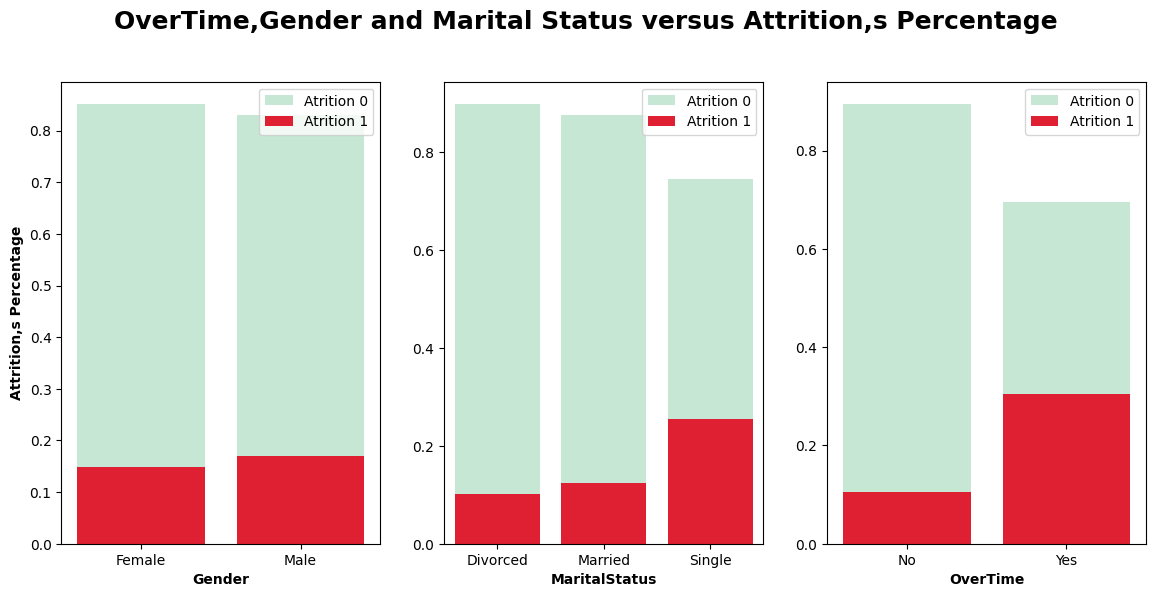

In [33]:
plt.figure(figsize=(14,6))
plt.suptitle('OverTime,Gender and Marital Status versus Attrition,s Percentage',fontweight="bold",fontsize=18,y=1.0)

for i,column in enumerate(["Gender","MaritalStatus","OverTime"],1):
    group =df.groupby(column)["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()

    plt.subplot(1, 3,i)
    sns.barplot(x=group.index,y=('Attrition_numeric', 0),data=group,color="#C0EDD2",label="Atrition 0")
    sns.barplot(x=group.index,y=('Attrition_numeric', 1),data=group,color="#FF0018",label="Atrition 1")
    if i == 1:
        plt.ylabel("Attrition,s Percentage",fontweight="bold")
    else:
        plt.ylabel("",fontweight="bold")
    plt.xlabel(column,fontweight="bold")
    plt.legend()
    plt.grid(False)

**Gender does not influence much, but being single and working a lot of overtime are important factors to take into account.**

**Working far away from home is also important, here we see that from 10 km away it begins to be noticed in the attrition rate**

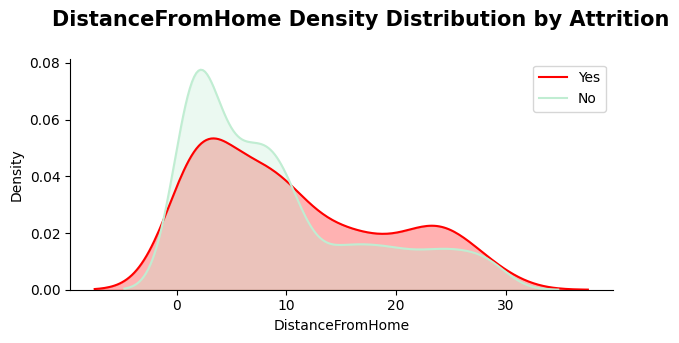

In [34]:
plt.figure(figsize=(7,3))
ax = sns.distplot(attrition_yes["DistanceFromHome"],hist=False,label="Yes",color="r")
ax = sns.distplot(attrition_no["DistanceFromHome"],hist=False,label="No",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
ax.text(-11.35,0.093,"DistanceFromHome Density Distribution by Attrition",
        fontsize=15, fontweight='bold')
plt.show()

**with the cut function I will make three groups: those who live up to 10,20 and 30 km away from work; then we make groupby and with value counts (normalize) we see the percentages in relation to Attriction**

In [35]:
cut_distance = pd.cut(df["DistanceFromHome"],bins=[1,10,20,30],include_lowest=False)
df.groupby(cut_distance)["Attrition_numeric"].value_counts(normalize=True).unstack()

Attrition_numeric,0,1
DistanceFromHome,,
"(1, 10]",0.855746,0.144254
"(10, 20]",0.800000,0.200000
"(20, 30]",0.779412,0.220588


**we find that as the distance increases, the attrition rate rises from 14 to 22 percent.**

# Monthly Income

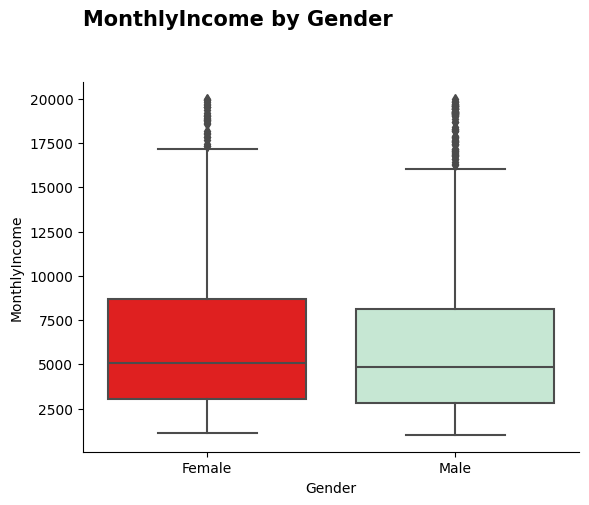

In [36]:
ax = sns.boxplot(x="Gender",y='MonthlyIncome',data=df,palette={"Female":"red","Male":"#C0EDD2"})
sns.despine()


ax.text(-0.5,24150,"MonthlyIncome by Gender",
        fontsize=15,
         fontweight='bold')

plt.show(block=False)

In [37]:
df.pivot_table('MonthlyIncome',index="JobRole",columns="Gender")

Gender,Female,Male
JobRole,,
Healthcare Representative,7433.803922,7589.300000
Human Resources,4540.687500,4100.222222
Laboratory Technician,3246.905882,3232.413793
Manager,16915.276596,17409.327273
Manufacturing Director,7409.166667,7182.671233
Research Director,15144.484848,16657.787234
Research Scientist,3344.473684,3173.044944
Sales Executive,6764.310606,7033.123711
Sales Representative,2671.947368,2587.200000


**now let's look at the salaries by department and their relation to the average of the whole company**

In [38]:
jobrole_income = df.groupby("JobRole")["MonthlyIncome"].describe()

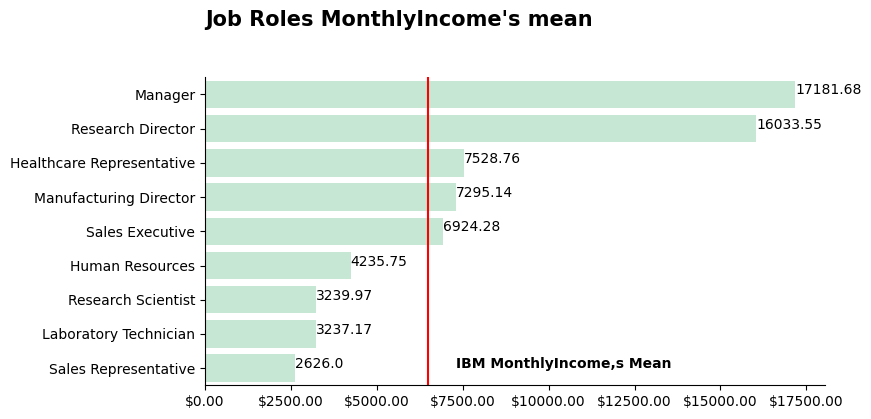

In [39]:
job_income_mean = jobrole_income["mean"].reset_index().sort_values(by="mean",ascending=False)
import matplotlib.ticker as ticker
plt.figure(figsize=(8,4))
ax = sns.barplot(y="JobRole",x="mean",data=job_income_mean,color="#C0EDD2")
# with axvline we can draw a vertical line
ax.axvline(df['MonthlyIncome'].mean(),color="red")

plt.ylabel("")
plt.xlabel("")
plt.grid(False)
sns.despine()
# add $ to axis
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)
# add text anotation
ax.text(7300, 8, "IBM MonthlyIncome,s Mean", horizontalalignment='left', size='medium', color='black', weight='semibold')
for text,num in zip(round(job_income_mean["mean"],2),range(9)):
    ax.text(text,num,text)
ax.text(-0.3,-2,"Job Roles MonthlyIncome's mean",
        fontsize=15,
         fontweight='bold')
plt.show()

**Now we are going to make a graph that reflects salaries, years worked in the company, satisfaction level and the attrition rate**

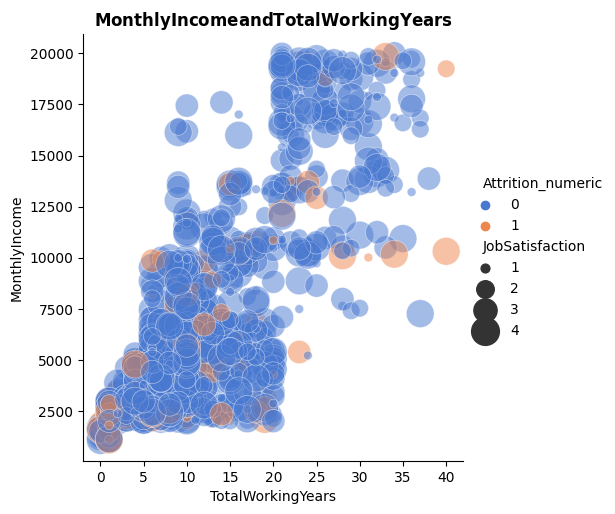

In [40]:
ax=sns.relplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition_numeric', size='JobSatisfaction',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=5, data=df)
sns.despine()
plt.title("$\\bf{MonthlyIncome and TotalWorkingYears}$")

plt.show(block=False)

# Finding categorical columns

In [41]:
obj_dtypes= [i for i in df.select_dtypes(include=object).columns]
obj_dtypes

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# Categorical variables encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in obj_dtypes:
    df[feat] = le.fit_transform(df[feat].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

# Checking the distribution of target variable

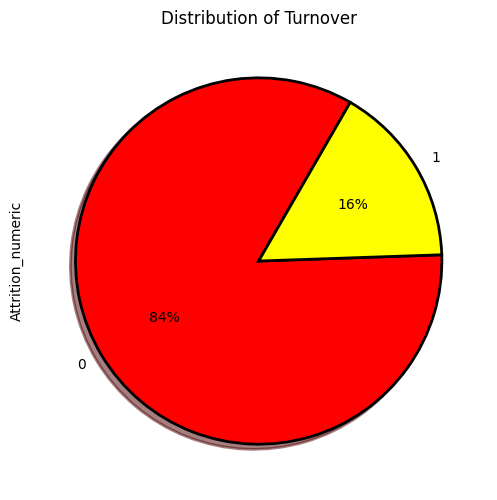

In [43]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
df['Attrition_numeric'].value_counts().plot.pie(autopct = '%1.0f%%' , colors=['red','yellow'],startangle = 60, wedgeprops={"linewidth":2 , "edgecolor":"k"}, shadow=True)
plt.title("Distribution of Turnover")
plt.show()

In [44]:
df['Attrition_numeric'].value_counts()

0    1233
1     237
Name: Attrition_numeric, dtype: int64

**As we can see above there is imbalanced data in target so let's make it balanced by applying SMOTE Technique.**

In [45]:
x=df.drop(['Attrition_numeric'] , axis = 1)
y=df['Attrition_numeric']

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
x_resampled,y_resampled=SMOTE().fit_resample(x,y)

In [48]:
y_resampled.value_counts()

1    1233
0    1233
Name: Attrition_numeric, dtype: int64

**Now we are having balanced data**

# **Splitting the data into train and test**

In [49]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled , test_size=0.1, random_state=0)


# **Model Building**

# 1.Logistic Regression

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(x_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=5)

In [51]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8355144083135053


**By applying the grid search hyperparameter tunning we have got the best parameters with the best accuracy 82.186%**

In [63]:
logreg = LogisticRegression(C = 10.0,
                            penalty = 'l2',
                            solver = 'newton-cg',
                           )
logreg.fit(x_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.8218623481781376


In [64]:
import sklearn.metrics as metrics
classification_report_tuned = metrics.classification_report(y_test , y_pred)
print(classification_report_tuned)


              precision    recall  f1-score   support

           0       0.83      0.78      0.80       115
           1       0.82      0.86      0.84       132

    accuracy                           0.82       247
   macro avg       0.82      0.82      0.82       247
weighted avg       0.82      0.82      0.82       247



In [65]:
from sklearn.metrics import accuracy_score
acc_scr_log_yuned= (accuracy_score(y_test , y_pred))
print('Overall accuracy of logistic regression model:', acc_scr_log_yuned)

Overall accuracy of logistic regression model: 0.8218623481781376


# 2.XG Boost Algorithm

In [66]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [67]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
# Fit
_ = grid_cv.fit(x_train, y_train)

In [68]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.9746592264274098
{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.8}


In [69]:
# Insert the new fixed values to the grid
param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

# Give new value ranges to other params
param_grid["gamma"] = [3, 5, 7]
param_grid["max_depth"] = [9, 15, 20]
param_grid["reg_lambda"] = [10, 30, 50]
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]

In [59]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid,
                         cv=3, scoring="roc_auc", n_jobs=-1)

_ = grid_cv_2.fit(x_train, y_train)

In [60]:
print(grid_cv_2.best_score_)
print(grid_cv_2.best_params_)

0.9588677923876802
{'colsample_bytree': 0.5, 'gamma': 3, 'learning_rate': 0.3, 'max_depth': 15, 'reg_lambda': 10, 'scale_pos_weight': 3, 'subsample': 0.8}


In [61]:
final_cl = xgb.XGBClassifier(
    colsample_bytree= 0.5, gamma= 0, learning_rate= 0.1, max_depth= 7, reg_lambda= 0, scale_pos_weight= 3, subsample= 0.8
)
_ = final_cl.fit(x_train, y_train)

In [62]:
pred_gs = final_cl.predict(X_test)
acc_scr_gs = (accuracy_score(y_test , pred_gs))
print('Overall accuracy of XG Boost_gs model:', acc_scr_gs)

Overall accuracy of XG Boost_gs model: 0.9068825910931174


**So we have got the best accuracy model from XG Boost Classifier with 90.69% accuracy.**